In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Import data

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyze data

In [3]:
# sum of survived people
print(sum(data.Survived))

# total of class
print(data.Pclass.unique())

# Sex gender
print(data.Sex.unique())

# average of age in passenger
print(np.mean(data.Age))

# average, max, and min of fare
print(np.mean(data.Fare),np.max(data.Fare),np.min(data.Fare))

342
[3 1 2]
['male' 'female']
29.69911764705882
32.2042079685746 512.3292 0.0


# Data Visualize

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


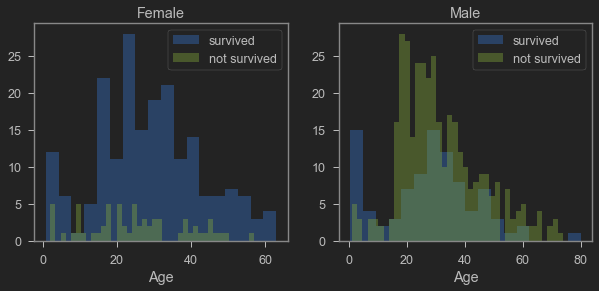

In [4]:
# Age and Sex Visualize
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax = ax.set_title('Male')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


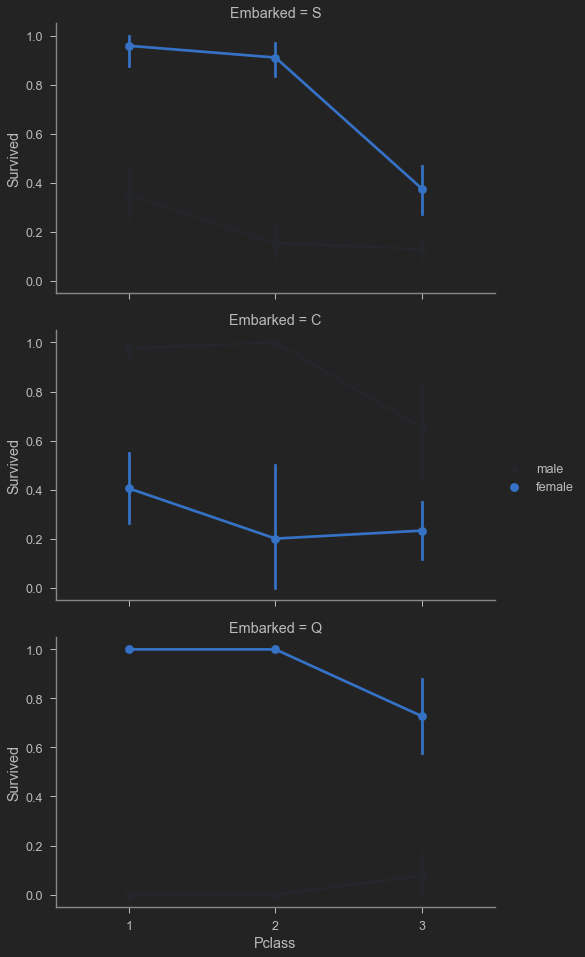

In [5]:
# Embarked, Pclass, and Sex Corelation
FacetGrid = sns.FacetGrid(data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

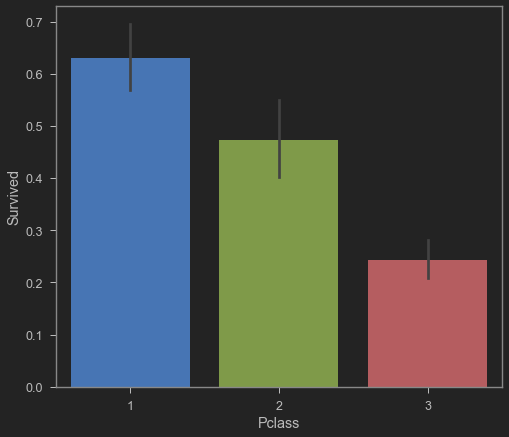

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


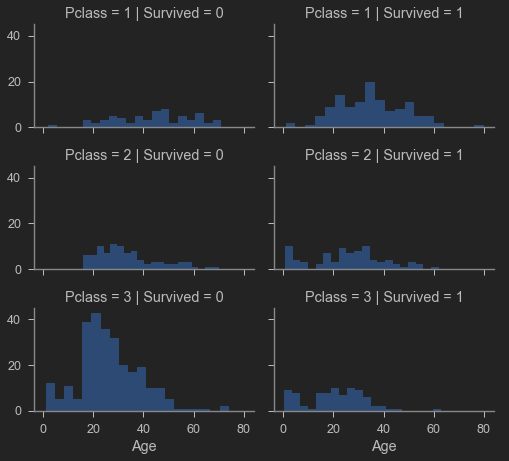

In [6]:
# Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Clean the data

In [7]:
# Change sex to integer
data['Sex'] = data['Sex'].str.replace('female','1')
data['Sex'] = data['Sex'].str.replace('male','0')
data['Sex'] = data['Sex'].astype(int)

test_data['Sex'] = test_data['Sex'].str.replace('female','1')
test_data['Sex'] = test_data['Sex'].str.replace('male','0')
test_data['Sex'] = test_data['Sex'].astype(int)

# Fill the nan values in the age column
data.Age.fillna(data.Age.mean(),inplace=True)
test_data.Age.fillna(test_data.Age.mean(),inplace=True)

data.Fare.fillna(data.Fare.mean(),inplace=True)
test_data.Fare.fillna(test_data.Fare.mean(),inplace=True)

# Create a first class column
data['FirstClass'] = data['Pclass'].apply(lambda x: 1 if x == 1 else 0)
test_data['FirstClass'] = test_data['Pclass'].apply(lambda x: 1 if x == 1 else 0)

# Create a second class column
data['SecondClass'] = data['Pclass'].apply(lambda x: 1 if x == 2 else 0)
test_data['SecondClass'] = test_data['Pclass'].apply(lambda x: 1 if x == 2 else 0)

# Create a third class column
data['ThirdClass'] = data['Pclass'].apply(lambda x: 1 if x == 3 else 0)
test_data['ThirdClass'] = test_data['Pclass'].apply(lambda x: 1 if x == 3 else 0)

data.head()
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


# Start the ML and Predict Probability

In [8]:
# Select the desired features
X_train = data[['Sex','Age','FirstClass','SecondClass','ThirdClass','Fare','Parch','SibSp']]
Y_train = data['Survived']

X_test = test_data[['Sex','Age','FirstClass','SecondClass','ThirdClass','Fare','Parch','SibSp']]
# y_test = test_data['Survived']

# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
rf_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
lr_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
knn_pred = knn.predict(X_test)  
acc_knn = knn.score(X_train, Y_train) 

# Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
gaussian_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Perceptron
perceptron = Perceptron(max_iter=100000)
perceptron.fit(X_train, Y_train)
perceptron_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

# Linear Support Vector Machine
linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, Y_train)
linear_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
dt_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree],
    'Sum':   [sum(linear_pred),sum(knn_pred),sum(lr_pred),
             sum(rf_pred),sum(gaussian_pred),sum(perceptron_pred),
             sum(sgd_pred),sum(dt_pred)]
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,Sum
Score,,
98.200000,Decision Tree,157
98.090000,Random Forest,136
79.910000,Support Vector Machines,152
79.910000,Logistic Regression,154
76.090000,Perceptron,179
75.870000,Naive Bayes,170
70.480000,Stochastic Gradient Decent,144
0.888889,KNN,145


# Convert to CSV

In [9]:
# initialize data of lists.
final = {'PassengerId':test_data.PassengerId,
        'Survived':rf_pred}
 
# Create DataFrame
final_data = pd.DataFrame(final)
 
# Print the output.
final_data

# Import
# final_data.to_csv(r'titanic_survival.csv', index=False)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
